In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_min_whole_validation_auc, top_min_dev_auc, read_files

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/wide-20shuffle-3seed.pkl']

In [5]:
top_k = 100000

In [6]:
best_mean_dev = top_mean_dev_auc(read_files(files), top_k)
best_mean_dev.groupby(['file', 'experiment_id']).ngroups

229

In [7]:
best_min_dev = top_min_dev_auc(read_files(files), top_k)
best_min_dev.groupby(['file', 'experiment_id']).ngroups

227

In [8]:
true_best = top_min_whole_validation_auc(read_files(files), top_k)
true_best.groupby(['file', 'experiment_id']).ngroups

234

In [9]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'max_overfit_auc',
                   'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [10]:
best_mean_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.809316  0.011167  0.792811  0.800923   
mean_validation_auc        100000.0  0.787926  0.011233  0.757318  0.779908   
mean_whole_validation_auc  100000.0  0.789786  0.011597  0.742193  0.782477   
max_overfit_auc            100000.0  0.032304  0.011239  0.016938  0.024177   
min_dev_auc                100000.0  0.781130  0.019898  0.500000  0.772006   
min_validation_auc         100000.0  0.778924  0.018678  0.500000  0.768605   
min_whole_validation_auc   100000.0  0.787317  0.013904  0.701223  0.780204   

                                50%       75%       max  
mean_dev_auc               0.806934  0.817206  0.836222  
mean_validation_auc        0.787431  0.796242  0.811560  
mean_whole_validation_auc  0.790039  0.798316  0.812687  
max_overfit_auc            0.028228  0.036827  0.098512  
min_dev_auc                0.781902  0.793790  0.813151  
min_validation_auc         0.781321  0.789876  0.807616  
min_whole_validation_auc   0.788221  0.796906  0.812425

In [11]:
best_min_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.808254  0.012326  0.779945  0.799332   
mean_validation_auc        100000.0  0.786783  0.012534  0.749723  0.777934   
mean_whole_validation_auc  100000.0  0.789183  0.012508  0.723018  0.782111   
max_overfit_auc            100000.0  0.030907  0.010738  0.016938  0.023871   
min_dev_auc                100000.0  0.783577  0.013899  0.759811  0.772194   
min_validation_auc         100000.0  0.780156  0.014075  0.731578  0.768357   
min_whole_validation_auc   100000.0  0.787179  0.013698  0.674365  0.779451   

                                50%       75%       max  
mean_dev_auc               0.806857  0.817073  0.836222  
mean_validation_auc        0.787241  0.795960  0.811560  
mean_whole_validation_auc  0.790084  0.798372  0.812687  
max_overfit_auc            0.027692  0.033341  0.122378  
min_dev_auc                0.781902  0.793790  0.813151  
min_validation_auc         0.781321  0.789876  0.807616  
min_whole_validation_auc   0.788348  0.797098  0.812425

In [12]:
true_best[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.793049  0.061195  0.500000  0.798284   
mean_validation_auc        100000.0  0.773128  0.057338  0.500000  0.778690   
mean_whole_validation_auc  100000.0  0.793643  0.008667  0.777883  0.786748   
max_overfit_auc            100000.0  0.032209  0.012729  0.000000  0.024240   
min_dev_auc                100000.0  0.757661  0.078131  0.338554  0.764135   
min_validation_auc         100000.0  0.756622  0.077116  0.357103  0.766448   
min_whole_validation_auc   100000.0  0.792112  0.008897  0.777773  0.784046   

                                50%       75%       max  
mean_dev_auc               0.806846  0.817177  0.836222  
mean_validation_auc        0.787374  0.796235  0.811560  
mean_whole_validation_auc  0.792079  0.800422  0.812687  
max_overfit_auc            0.028698  0.038242  0.111053  
min_dev_auc                0.781795  0.793783  0.813151  
min_validation_auc         0.781180  0.789876  0.807616  
min_whole_validation_auc   0.790570  0.798880  0.812425

In [13]:
best = best_mean_dev

In [14]:
best.shape

(100000, 61)

In [15]:
best.groupby(SET_PARAMETERS + ['file', 'experiment_id']).size().groupby(SET_PARAMETERS).size()

param_is_unbalance  param_boost_from_average
False               False                        34
                    True                         34
True                False                       107
                    True                         54
dtype: int64

In [16]:
best['param_bagging_enable'] = (best.param_bagging_freq != 0)
best.groupby('param_bagging_enable').size()

param_bagging_enable
False    57783
True     42217
dtype: int64

In [17]:
best['param_feature_fraction_enable'] = (best.param_feature_fraction != 1)
best.groupby('param_feature_fraction_enable').size()

param_feature_fraction_enable
True    100000
dtype: int64

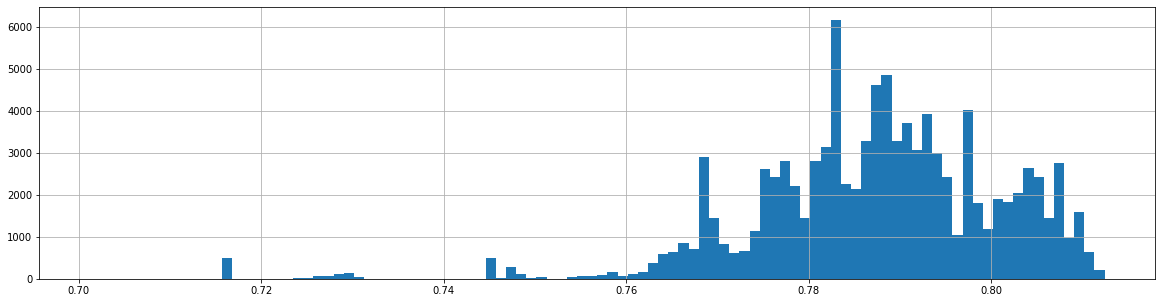

In [18]:
best.min_whole_validation_auc.hist(bins=100);

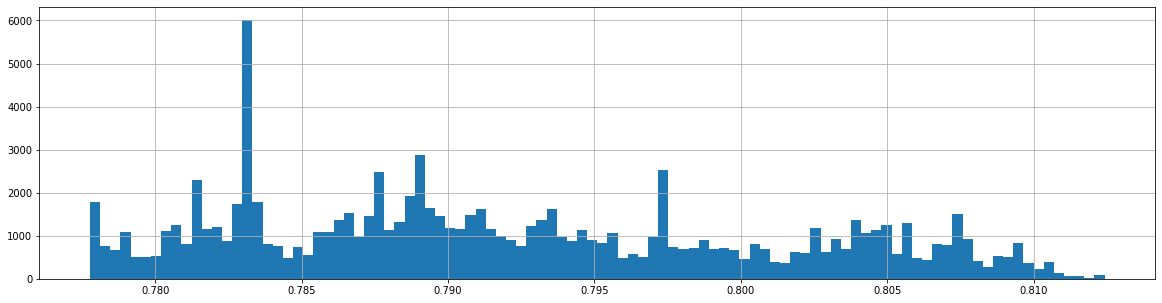

In [19]:
true_best.min_whole_validation_auc.hist(bins=100);

In [20]:
best_iteration = best.sort_values('mean_dev_auc').groupby(['file', 'experiment_id']).last()

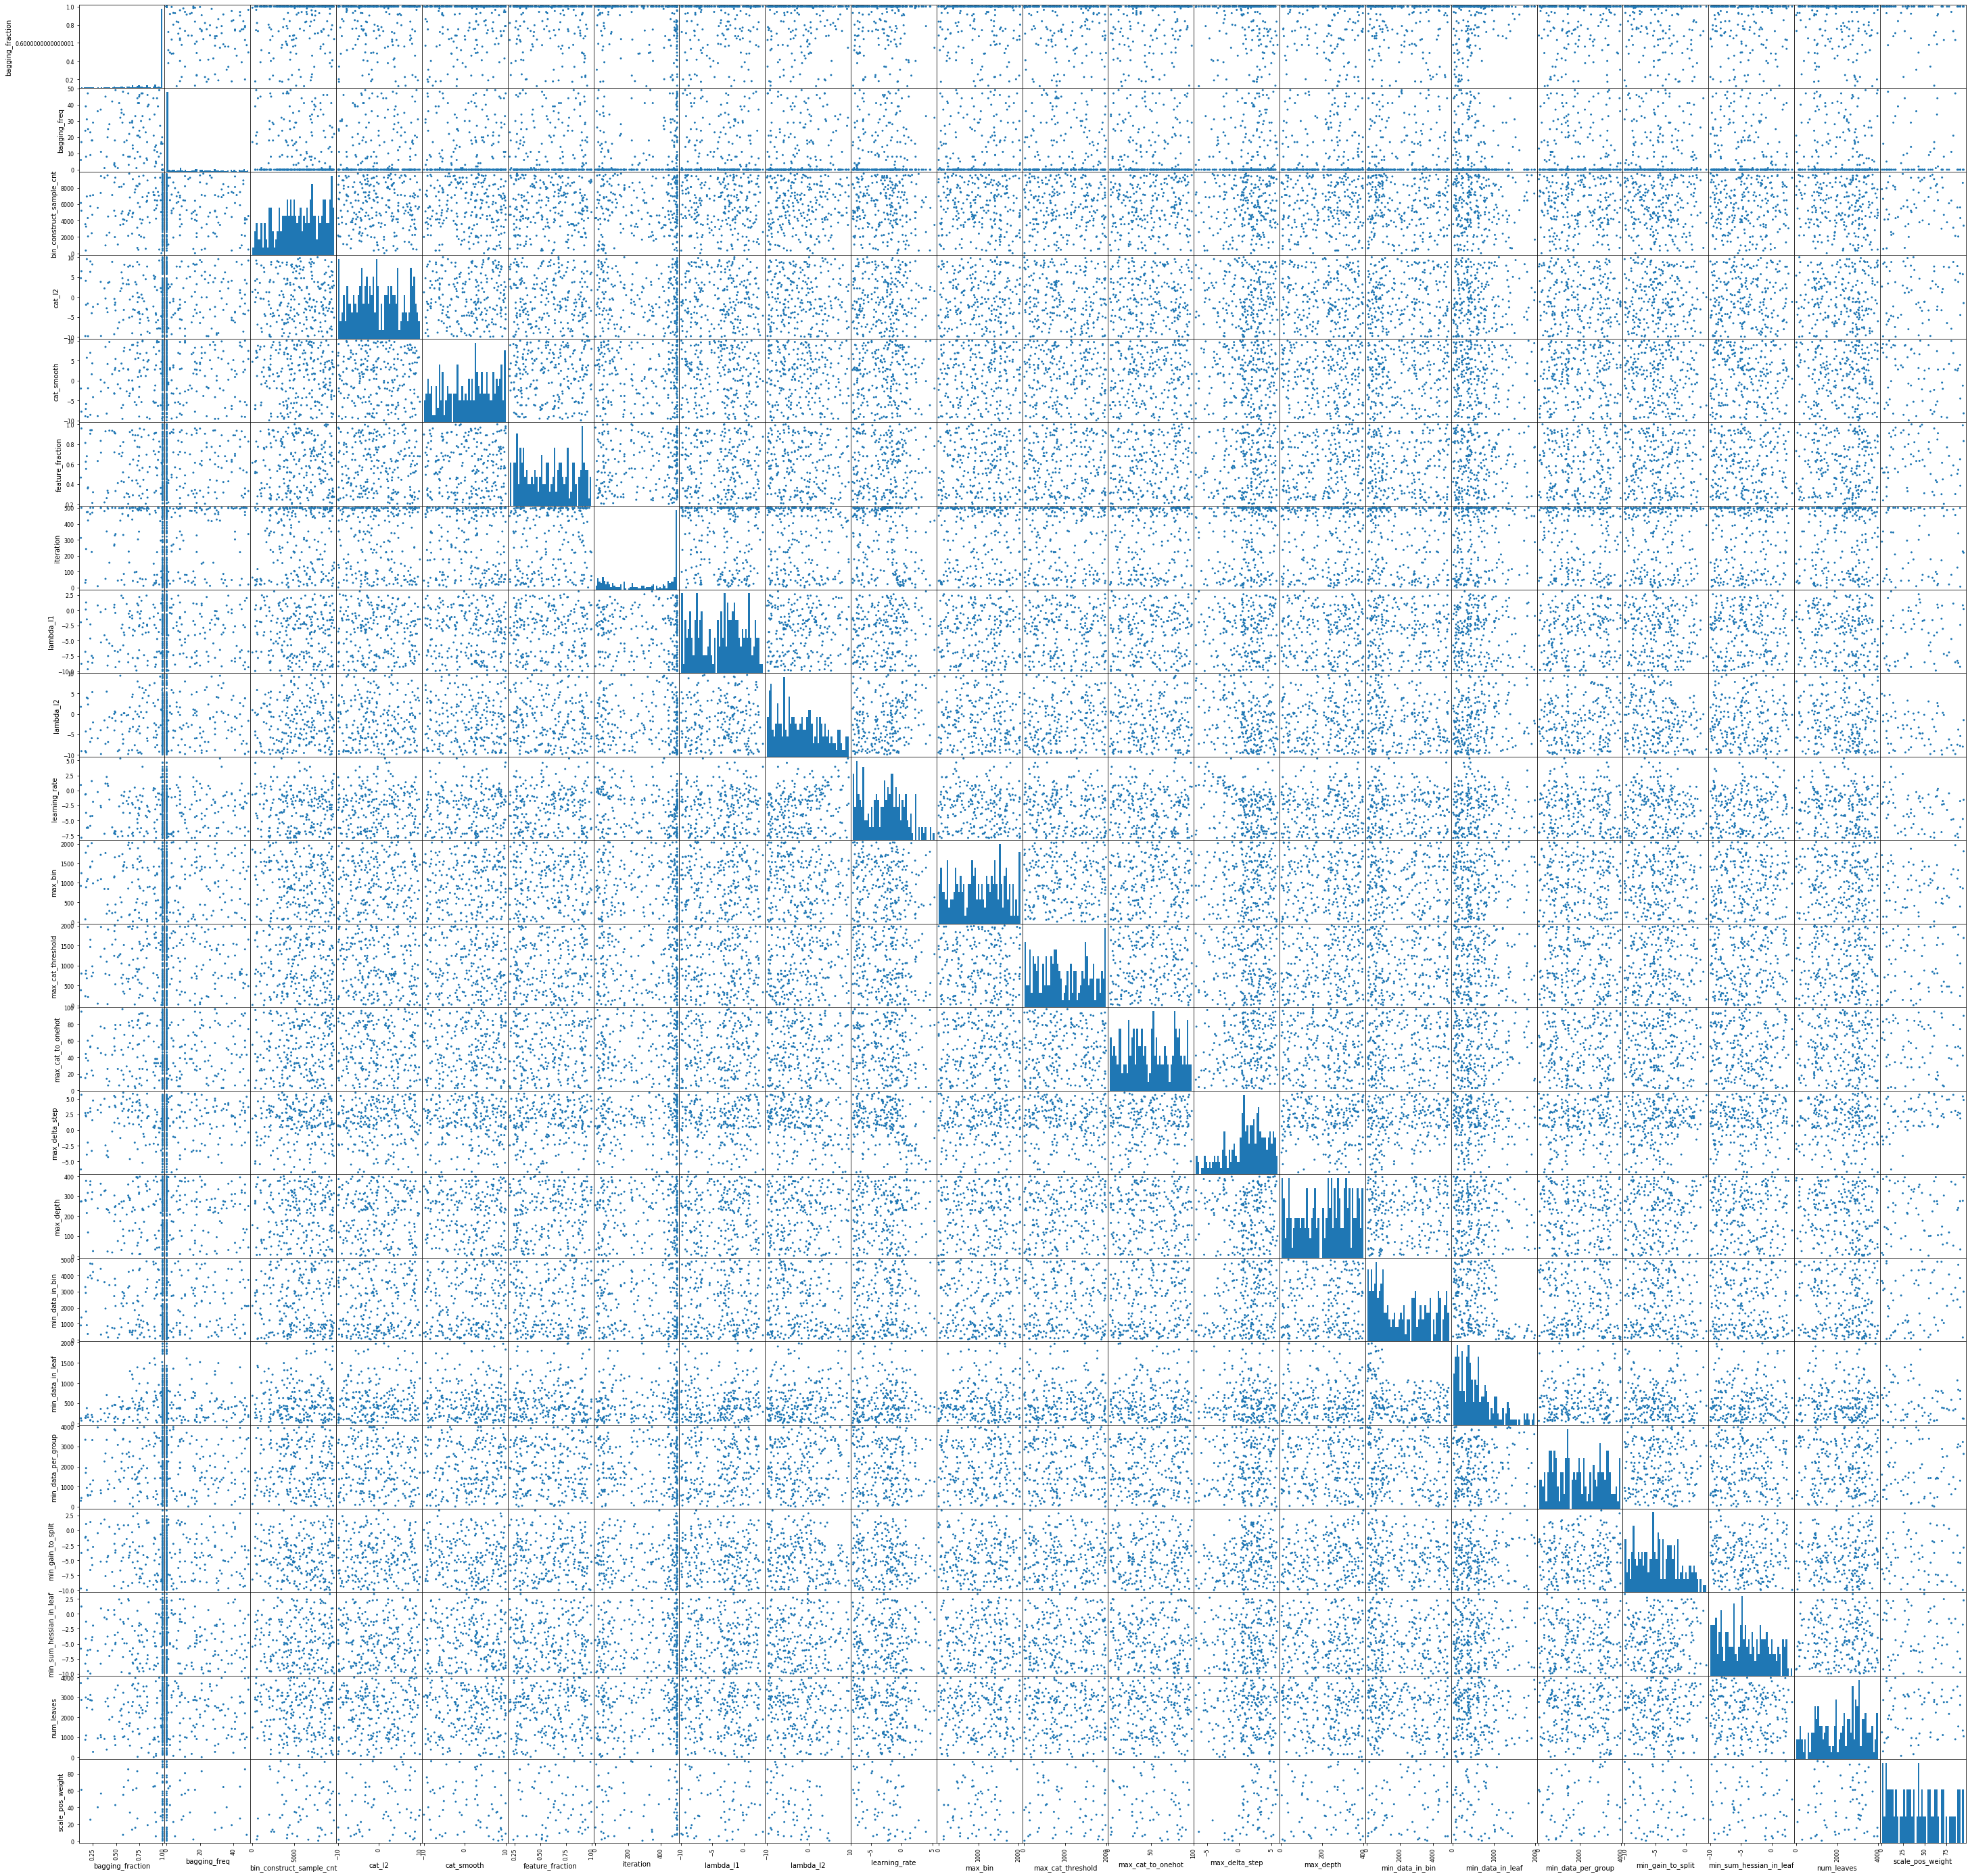

In [21]:
pd.plotting.scatter_matrix(
    pd.concat([best_iteration[CONT_PARAMETERS + INT_PARAMETERS], 
               np.log10(best_iteration[list(set(LOG_PARAMETERS))])],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_', ''), axis='columns').sort_index(axis=1),
    alpha=1, figsize=(50, 50), hist_kwds={'bins': 50});

### check failures in best selected parameter range

In [22]:
best_range = best\
    [[c for c in best.columns if c.startswith('param_') and not c in SET_PARAMETERS]]\
    .drop(columns=['param_seed', 'param_bagging_enable', 'param_feature_fraction_enable'])\
    .quantile([0, 1]).T
best_range

0.0           1.0
param_bagging_fraction          1.229164e-01  1.000000e+00
param_bagging_freq              0.000000e+00  4.900000e+01
param_bin_construct_sample_cnt  1.000000e+01  9.706000e+03
param_cat_l2                    1.012291e-10  9.845643e+09
param_cat_smooth                1.040472e-10  9.847039e+09
param_feature_fraction          2.008578e-01  9.977182e-01
param_lambda_l1                 1.061871e-10  1.215634e+03
param_lambda_l2                 1.152914e-10  3.467728e+09
param_learning_rate             1.126985e-08  2.009177e+05
param_max_bin                   4.000000e+00  2.043000e+03
param_max_cat_threshold         7.000000e+00  1.998000e+03
param_max_cat_to_onehot         2.000000e+00  9.800000e+01
param_max_delta_step            1.656138e-07  9.810300e+05
param_max_depth                 2.000000e+00  3.990000e+02
param_min_data_in_bin           3.100000e+01  4.975000e+03
param_min_data_in_leaf          1.200000e+01  1.984000e+03
param_min_data_per_group        4.000000e+00  3.975000e+03
param_min_gain_to_split         1.021322e-10  2.173655e+03
param_min_sum_hessian_in_leaf   1.055575e-10  1.953265e+03
param_num_leaves                5.000000e+00  3.984000e+03
param_scale_pos_weight          4.582134e-01  9.476338e+01

In [23]:
dfs = []
for f in files:
    df = pd.read_pickle(f).assign(file=f)
    for (n, l, h) in best_range.itertuples():
        df = df[(((df[n] >= l) & (df[n] <= h))
                 | df[n].isna())].copy()
    dfs.append(df)

limited = pd.concat(dfs, ignore_index=True, sort=True)
del dfs
limited.shape

(1039500, 61)

In [24]:
limited_best_iteration = limited.sort_values('min_whole_validation_auc').groupby(['file', 'experiment_id']).last()
limited_best_iteration.shape

(2079, 59)

In [25]:
limited_bad = limited_best_iteration[limited_best_iteration.min_whole_validation_auc < 0.6]

In [26]:
limited_bad.shape

(1177, 59)

TODO pikachu with bruises reaction

### top parameters

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(best_iteration.sort_values('mean_dev_auc', ascending=False).head(2).T)

file                                 ./experiments/wide-20shuffle-3seed.pkl  \
experiment_id                                                          273    
cnt                                                                       3   
iteration                                                                68   
max_dev_auc                                                        0.856704   
max_dev_binary_logloss                                               1.6425   
max_overfit_auc                                                   0.0345223   
max_overfit_binary_logloss                                        0.0442678   
max_validation_auc                                                 0.811469   
max_validation_binary_logloss                                       1.65379   
max_whole_train_auc                                                0.841907   
max_whole_train_binary_logloss                                       1.5662   
max_whole_validation_auc                            